<a href="https://colab.research.google.com/github/YoungPrzemoDev/AI-Projects/blob/main/daj_wiecej.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Multi layer perceptor

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt  # for making figures
%matplotlib inline


In [ ]:
# read in all the words
words = open('/content/sample_data/names.txt', 'r').read().splitlines()
words[:8]


['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
print(stoi)
itos = {i:s for s, i in stoi.items()}
#print(itos)


{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [ ]:
# build the dataset
block_size = 3  # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
   # print(w)
    context = [0] * block_size #Tworzy liste 0 w tym przypadku [0,0,0]
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
       # print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]  # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)


In [ ]:
X.shape

torch.Size([228146, 3])

In [ ]:
C = torch.randn(27,2) #wiersze to unikalne kategorie a kolumna to liczba wymiarów embedding - osadzania

In [ ]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [ ]:
W1 = torch.randn(6,100)
b1 = torch.randn(100)

In [ ]:
emb

tensor([[[-0.8480,  0.3390],
         [-0.8480,  0.3390],
         [-0.8480,  0.3390]],

        [[-0.8480,  0.3390],
         [-0.8480,  0.3390],
         [-0.1527, -0.9825]],

        [[-0.8480,  0.3390],
         [-0.1527, -0.9825],
         [-1.9904, -0.8678]],

        ...,

        [[-1.3566,  0.1116],
         [-1.3566,  0.1116],
         [ 0.4472,  0.0250]],

        [[-1.3566,  0.1116],
         [ 0.4472,  0.0250],
         [-1.3566,  0.1116]],

        [[ 0.4472,  0.0250],
         [-1.3566,  0.1116],
         [-0.8783, -1.4551]]])

In [ ]:
emb[:,2,:].shape # slicing

torch.Size([228146, 2])

In [ ]:
torch.cat([emb[:,0,:], emb[:,1,:]], 1).shape # .cat dokłada do tensora, specyfikujemy czy ma dolozyc do kolmnu czy do wiersza

torch.Size([228146, 4])

In [ ]:
torch.unbind(emb,1) # daje tensory według którego wymiaru podzliles jesli 0 to 32 tensory o wymiarach 3 na 2 jesli 1 to 3 tensory 32 na 2

(tensor([[-0.8480,  0.3390],
         [-0.8480,  0.3390],
         [-0.8480,  0.3390],
         ...,
         [-1.3566,  0.1116],
         [-1.3566,  0.1116],
         [ 0.4472,  0.0250]]),
 tensor([[-0.8480,  0.3390],
         [-0.8480,  0.3390],
         [-0.1527, -0.9825],
         ...,
         [-1.3566,  0.1116],
         [ 0.4472,  0.0250],
         [-1.3566,  0.1116]]),
 tensor([[-0.8480,  0.3390],
         [-0.1527, -0.9825],
         [-1.9904, -0.8678],
         ...,
         [ 0.4472,  0.0250],
         [-1.3566,  0.1116],
         [-0.8783, -1.4551]]))

In [ ]:
torch.cat(torch.unbind(emb,1),1) # dajemy 3 tesnory 32 na 2 i chcemy jes polaczyc kolumnami czyli drugim wymiarem zeby dostac 32 na 6

tensor([[-0.8480,  0.3390, -0.8480,  0.3390, -0.8480,  0.3390],
        [-0.8480,  0.3390, -0.8480,  0.3390, -0.1527, -0.9825],
        [-0.8480,  0.3390, -0.1527, -0.9825, -1.9904, -0.8678],
        ...,
        [-1.3566,  0.1116, -1.3566,  0.1116,  0.4472,  0.0250],
        [-1.3566,  0.1116,  0.4472,  0.0250, -1.3566,  0.1116],
        [ 0.4472,  0.0250, -1.3566,  0.1116, -0.8783, -1.4551]])

In [ ]:
#ALE AKURAT W TYM PRZYPADKU JEST LEPSZY SPOSÓB NA TO, INTERNALS

In [ ]:
emb.view(-1,6) # -1 dla tego ze nie musimy wtedy ustalac pierwszego wymiaru tylko samo jest liczone

tensor([[-0.8480,  0.3390, -0.8480,  0.3390, -0.8480,  0.3390],
        [-0.8480,  0.3390, -0.8480,  0.3390, -0.1527, -0.9825],
        [-0.8480,  0.3390, -0.1527, -0.9825, -1.9904, -0.8678],
        ...,
        [-1.3566,  0.1116, -1.3566,  0.1116,  0.4472,  0.0250],
        [-1.3566,  0.1116,  0.4472,  0.0250, -1.3566,  0.1116],
        [ 0.4472,  0.0250, -1.3566,  0.1116, -0.8783, -1.4551]])

In [ ]:
h = torch.tanh(emb.view(-1,6).float() @ W1 + b1)

# bias jest git bo bedzie dodawal wartosci do wszystkich wierszy
# 32 na 100
# 1  na 100
# broadcasting na wierszach

In [ ]:
h

tensor([[-0.1749, -0.8700, -0.9606,  ...,  0.6806,  0.8477,  0.5526],
        [ 0.7010,  0.1465, -0.8276,  ...,  0.5883, -0.9717, -0.8217],
        [ 0.7183,  0.9964, -0.9929,  ..., -0.1824, -0.9898,  0.5355],
        ...,
        [-0.7891, -0.9938, -0.9930,  ...,  0.9749, -0.3658, -0.7658],
        [ 0.9779,  0.9243, -0.4816,  ...,  0.8277, -0.0532,  0.6193],
        [ 0.9187,  0.8593, -0.9990,  ..., -0.6571, -0.9830, -0.9555]])

In [ ]:
h.shape

torch.Size([228146, 100])

In [ ]:
W2 = torch.rand(100,27)
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits.shape

torch.Size([228146, 27])

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts/counts.sum(1, keepdims = True)

In [ ]:
prob.shape

torch.Size([228146, 27])

In [ ]:
prob[2].sum()

tensor(1.)

In [ ]:
loss = -prob[torch.arange(32), Y].log().mean() # 32 bo ma byc number of samples a nie neuronow
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [ ]:
#------SUMMARIZE--------

In [ ]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [ ]:
g= torch.Generator().manual_seed(21474836447)
C = torch.randn((27,2),generator =g) # rows to uniklane labely a kolumny 2 bo tylko 27 labels
W1 = torch.randn((6,100),generator=g) # dajemy na 6 bo 2 dimensional embeding * 3 =6
b1 = torch.randn((100),generator= g)
W2 = torch.randn((100,27),generator= g)
b2 = torch.randn((27),generator= g)
parameters=[C,W1,b1,W2,b2]

In [ ]:
sum(p.nelement() for p in parameters)

3481

In [ ]:
X.shape

torch.Size([228146, 3])

In [ ]:
emb = C[X] # (228146,3,2)
h = torch.tanh(emb.view(-1,6) @ W1 +b1) # (228146,100)
logits = h @ W2 + b2 # (32, 27)
counts = logits.exp()
probs = counts/counts.sum(1, keepdims=True)
loss = -probs[torch.arange(228146), Y].log().mean()
loss

tensor(2.3617, grad_fn=<NegBackward0>)

In [ ]:
loss = F.cross_entropy(logits,Y) # daje to samo co my napisalismy tylko z lespzym efficiency wiec od teraz uzywamy tego
loss

In [ ]:
 for p in parameters:
  p.requires_grad = True ## jesli nie damy tego kodu nie ebdzie nam optymalizowalo modelu, nie ebdzi eliczylo gradientu

In [ ]:
#Tworzymy tensor miedzy 0.001 a 1 aby odpowiendio dobrac krok uczenia
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

In [ ]:
lri =[]
lossi=[]

for i in range(1000):

  #mini batch
  ix = torch.randint(0,X.shape[0], (32,)) # losujemy za kazdym razem 32 lcizby z przedzialu 0 i 228146 bo X[0] tyle jest

  #Forward Pass
  emb = C[X[ix]] # (32,3,2)
  h = torch.tanh(emb.view(-1,6) @ W1 +b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits,Y[ix])
  print(loss.item())

  #Backward Pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  lr =lrs[i]
  for p in parameters:
    p.data += -lr * p.grad

  #track stats
  lri.append(lre[i])
  lossi.append(loss.item())

#print(loss.item())

In [ ]:
plt.plot(lri,lossi)

In [ ]:
#Widac ze 0.1 jest dobrym learning rate

In [ ]:
#Teraz dzielimy nasze dane na treningowe walidacyjne i testowe

In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182441, 3]) torch.Size([182441])
torch.Size([22902, 3]) torch.Size([22902])
torch.Size([22803, 3]) torch.Size([22803])


In [ ]:
Xtr.shape, Ytr.shape

(torch.Size([182441, 3]), torch.Size([182441]))

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,10),generator =g) # rows to uniklane labely a kolumny to embedings, jako hiperparametr, mozemy sobie dostosowywac
W1 = torch.randn((30,200),generator=g) # dajemy na 30 bo 10 dimensional embeding * 3 bo X ma 3 kolumny bo taki jesty block size =30
b1 = torch.randn((200),generator= g)
W2 = torch.randn((200,27),generator= g)
b2 = torch.randn((27),generator= g)
parameters=[C,W1,b1,W2,b2]

In [ ]:
 for p in parameters:
  p.requires_grad = True ## jesli nie damy tego kodu nie ebdzie nam optymalizowalo modelu, nie ebdzi eliczylo gradientu

In [ ]:
#Tworzymy tensor miedzy 0.001 a 1 aby odpowiendio dobrac krok uczenia
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [ ]:
lri =[]
lossi=[]
stepi = []

In [ ]:
for i in range(200000):

  #mini batch
  ix = torch.randint(0,Xtr.shape[0], (64,)) # losujemy za kazdym razem 32 lcizby z przedzialu 0 i 228146 bo X[0] tyle jest

  #Forward Pass
  emb = C[Xtr[ix]] # (32,3,10)
  h = torch.tanh(emb.view(-1,30) @ W1 +b1) # (32,100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits,Ytr[ix])
  #print(loss.item())


  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

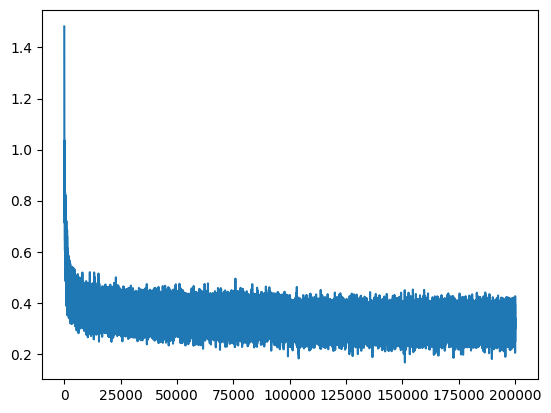

In [ ]:
plt.plot(stepi,lossi)

In [ ]:
emb = C[Xdev] # (32,10,3)
h = torch.tanh(emb.view(-1,30) @ W1 +b1) # (32,100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1531, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[Xtr] # (32,10,3)
h = torch.tanh(emb.view(-1,30) @ W1 +b1) # (32,100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1151, grad_fn=<NllLossBackward0>)

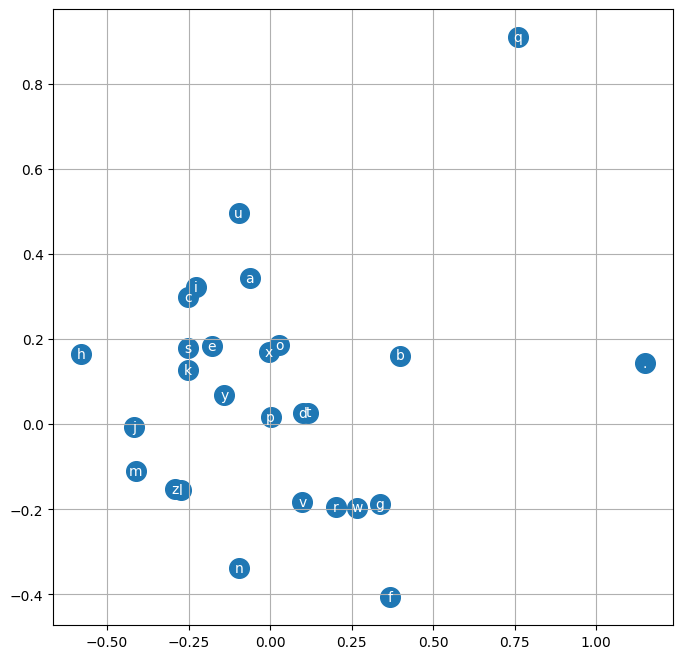

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

mohaal.
yazliee.
mad.
ryla.
ren.
rucendraega.
zered.
elin.
shi.
jen.
eden.
estanar.
kayzior.
kalin.
shravrixhiriel.
kinde.
jenelanie.
cayus.
kaveer.
yaque.
